<a href="https://colab.research.google.com/github/Shaghayegh-Dianat/Nural-Network/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte carlo vs Black scholes formula



Call option price with Monte Carlo: 1.1299039311578039
Option price with Black-Scholes: 1.1103425091866441
difference 0.01956142197115973


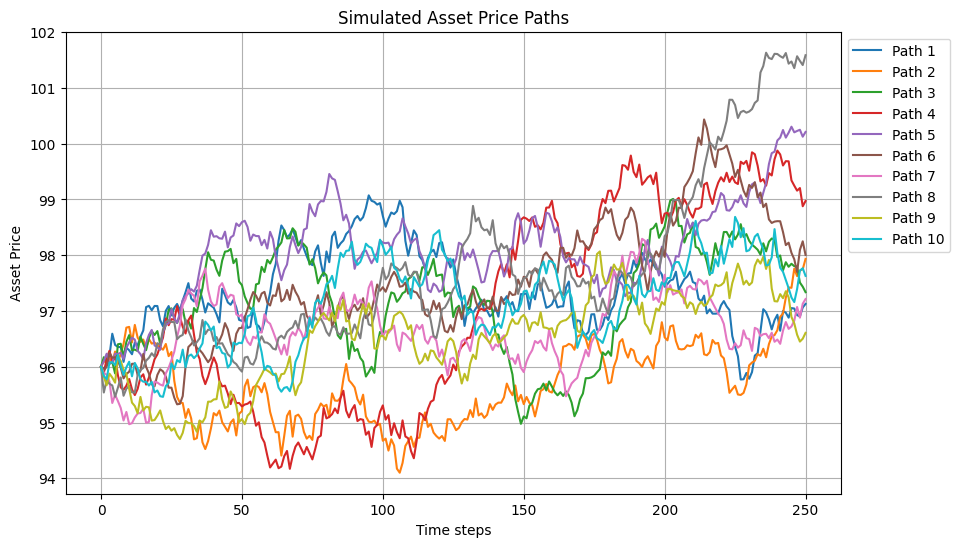

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def monte_carlo_option_price(T, r, sigma, K, S0, num_steps, num_simulations):
    dt = T / num_steps
    price_paths = np.zeros((num_simulations, num_steps + 1))
    price_paths[:, 0] = S0  # Initialize price_paths with S0
    for t in range(1, num_steps + 1):
        z = np.random.standard_normal(num_simulations)
        price_paths[:, t] = price_paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    call_payoffs = np.maximum(price_paths[:, -1] - K, 0)  # Calculating the payoff for a European call option
    option_price = np.exp(-r * T) * np.mean(call_payoffs)
    return option_price, price_paths  # Return both option price and price_paths

def black_scholes(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0* norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Parameters for the option
S0 =96  # initial stock price
K = 100   # strike price
T = 1.0   # time to maturity
r = 0.04  # risk-free rate
sigma = 0.03  # volatility
num_steps = 250
num_simulations = 1000

monte_carlo_price, price_paths = monte_carlo_option_price(T, r, sigma, K, S0, num_steps, num_simulations)
black_scholes_price = black_scholes(S0, K, T, r, sigma)
difference = abs(monte_carlo_price - black_scholes_price)

print("Call option price with Monte Carlo:", monte_carlo_price)
print("Option price with Black-Scholes:", black_scholes_price)
print("difference", difference)

# Plotting some of the simulated price paths
num_paths_to_plot = 10
plt.figure(figsize=(10, 6))
for i in range(num_paths_to_plot):
    plt.plot(price_paths[i], label=f'Path {i+1}')
plt.title('Simulated Asset Price Paths')
plt.xlabel('Time steps')
plt.ylabel('Asset Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


MONTE CARLO WITHOUT PRICE PATHS


In [ ]:
import numpy as np
from scipy.stats import norm

def monte_carlo_price(n_simulations, T, r, sigma, S0, K):
    Z = np.random.normal(size=n_simulations)
    WT = np.sqrt(T) * Z
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * WT)
    call_payoffs = np.maximum(ST - K, 0)
    option_price = np.exp(-r * T) *np.mean(call_payoffs)
    return option_price


def black_scholes(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0* norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Parameters for the option
S0 = 96  # initial stock price
K = 100   # strike price
T = 1.0   # time to maturity
r = 0.04  # risk-free rate
sigma = 0.03  # volatility
n_simulations=1000
monte_karlo_price = monte_carlo_price(n_simulations, T, r, sigma, S0, K)
black_scholes_price=black_scholes(S0, K, T, r, sigma)
difference= abs(monte_karlo_price-black_scholes_price)
print(f"European Call Option Price with Monte Carlo:$",monte_karlo_price)

print(f"European Call Option Price with Black Scholes:$",black_scholes_price)

print("difference",difference)

European Call Option Price with Monte Carlo:$ 1.1537351121224266
European Call Option Price with Black Scholes:$ 1.1103425091866441
difference 0.04339260293578251


In [ ]:
import pandas as pd

# Specify the columns you want to import\

option_price=[2]
columns_to_import=[0,1,3]
# Load the specific columns from the specified range of rows into a pandas DataFrame
df = pd.read_excel('/content/main.xlsx', usecols=columns_to_import)
df1= pd.read_excel('/content/main.xlsx', usecols=option_price)
# Now df contains only the specified columns from the first row to the 1000th row (rows 0 to 999)
print(df)
print(df1)

      [UNDERLYING_LAST]   [DTE]   [STRIKE]
0                138.90     7.0       85.0
1                138.90     7.0      100.0
2                138.90     7.0      105.0
3                138.90     7.0      110.0
4                138.90     7.0      115.0
..                  ...     ...        ...
983              141.61   437.0      210.0
984              141.61   437.0      220.0
985              142.96     2.0       85.0
986              142.96     2.0      100.0
987              142.96     2.0      105.0

[988 rows x 3 columns]
      [C_LAST]
0        57.20
1        33.60
2        30.65
3        31.09
4        24.50
..         ...
983       3.48
984       2.03
985      57.20
986      33.60
987      30.65

[988 rows x 1 columns]


# Neural Network for option pricing

Epoch 1/200
44/44 [==============================] - 1s 6ms/step - loss: 10.5721 - val_loss: 2.9262 - lr: 0.0100
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 4.4803 - val_loss: 2.8079 - lr: 0.0100
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 3.7552 - val_loss: 1.9561 - lr: 0.0100
Epoch 4/200
44/44 [==============================] - 0s 5ms/step - loss: 3.5645 - val_loss: 2.1039 - lr: 0.0100
Epoch 5/200
44/44 [==============================] - 0s 5ms/step - loss: 3.6795 - val_loss: 1.9192 - lr: 0.0100
Epoch 6/200
44/44 [==============================] - 0s 5ms/step - loss: 3.4178 - val_loss: 2.1000 - lr: 0.0100
Epoch 7/200
44/44 [==============================] - 0s 5ms/step - loss: 3.5947 - val_loss: 1.8770 - lr: 0.0100
Epoch 8/200
44/44 [==============================] - 0s 4ms/step - loss: 3.3880 - val_loss: 2.5839 - lr: 0.0100
Epoch 9/200
44/44 [==============================] - 0s 4ms/step - loss: 3.6259 - val_loss: 1.9365 - lr

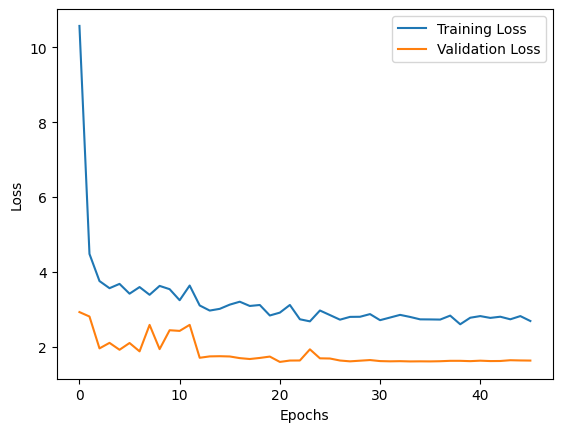

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/main.xlsx')
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=data.columns[[0, 1, 3, 2]])

# Extract features and target variable
X = data.iloc[:, [0, 1, 3]].values
y = data.iloc[:, 2].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build the neural network model

model = Sequential([
    Dense(128, activation='relu', input_shape=(3,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1,activation='linear')  # Output layer for option price
])

# Compile the model

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')

# Learning rate scheduler and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=18, validation_data=(X_test, y_test), callbacks=[reduce_lr,early_stopping], shuffle=True)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Final Loss: {loss}')

# Extract the last 5 samples
X_last_5 = X_test[-5:]
y_last_5 = y_test[-5:]

# Make predictions for the last 5 samples
predictions_last_5 = model.predict(X_last_5)

# Print the last 5 predicted and actual option prices
print("Last 5 predicted and actual option prices:")
for i in range(5):
    print(f"Predicted price: {predictions_last_5[i][0]}, Actual price: {y_last_5[i]}")
# Plot the loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
